## Comparity Study of Machine Learning Algorithms for Email Campaigns

##### Importing all the required libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

##### Reading the sample data csv file, creating the dataset

In [2]:
sales_data=pd.read_csv("CE802_Ass_Resit.csv")

In [3]:
sales_data.head()   #displays the first 5 rows of the dataset.

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False


In [4]:
sales_data.tail()   #displays the last 5 rows of the dataset.

,F1,F2,F3,F4,F5,F6,F7,F8,C
995,2,1.51,2,-1.76,10,0.74,1,0.09,True
996,-13,0.12,10,2.08,0,0.10,1,0.35,True
997,-10,1.74,4,-2.37,5,0.71,1,0.61,False
998,-18,1.33,66,2.09,4,0.26,1,0.36,True
999,15,0.34,23,-1.23,0,0.88,1,0.03,False


In [5]:
sales_data.columns #displays the column names in the dataset.

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'C'], dtype='object')

In [6]:
sales_data.info() #displays the informations about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   int64  
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   int64  
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   int64  
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   int64  
 7   F8      1000 non-null   float64
 8   C       1000 non-null   bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 63.6 KB


##### Preprocessing the data

The information about whether the email led to a sale (Conversion) is represented by the column 'C'. The values in this column are in the boolean format (True or False). For ease of the calculations, they are converted into numerical values. That is True=1 and False=0.

In [7]:
sales_data.loc[(sales_data.C == True), 'C'] = 1  # Converting 'True' into 1.
sales_data.loc[(sales_data.C == False), 'C'] = 0 # Conerting 'False' into 0

In [8]:
sales_data.head(10) #Display first 10 rows to check whether the changes are done or not.

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,1
1,3,0.65,15,1.51,9,0.91,1,0.68,1
2,-10,0.21,39,1.67,5,0.10,1,0.58,1
3,-12,1.45,20,-1.54,9,0.70,1,0.27,1
4,13,0.03,41,2.21,9,0.39,1,1.03,0
5,-16,0.64,10,0.61,7,0.91,1,0.39,0
6,8,0.37,16,1.23,10,0.44,1,0.12,1
7,-19,1.53,16,-1.61,2,0.09,1,0.40,0
8,15,1.81,9,-3.04,3,0.42,1,0.39,0
9,0,0.41,12,2.12,14,0.92,1,0.04,0


Checking for presence of the missing values in the dataset.

In [9]:
sales_data.isnull().sum()

F1    0
F2    0
F3    0
F4    0
F5    0
F6    0
F7    0
F8    0
C     0
dtype: int64

From the above method we can see that there is no missing values in the dataset.

##### Getting the distrubution of converted sales (sale used the promo code shared in email campaign) and normal sales.

In [10]:
sales_data['C'].value_counts()

0    512
1    488
Name: C, dtype: int64

From the above code we can found that from the dataset, there are 488 sales happened through the email campaigns and 512 are the normal sales.

In [11]:
bought1=sales_data[sales_data.C == 1]      # created a sample dataset of converted sales for the ease of calculation.
notbought1=sales_data[sales_data.C == 0]   # created a sample dataset of non-converted sales for the ease of calculation.

In [12]:
bought1.head() # Checking whether the changes are done.

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,1
1,3,0.65,15,1.51,9,0.91,1,0.68,1
2,-10,0.21,39,1.67,5,0.10,1,0.58,1
3,-12,1.45,20,-1.54,9,0.70,1,0.27,1
6,8,0.37,16,1.23,10,0.44,1,0.12,1


In [13]:
notbought1.head() # Checking whether the changes are done.

,F1,F2,F3,F4,F5,F6,F7,F8,C
4,13,0.03,41,2.21,9,0.39,1,1.03,0
5,-16,0.64,10,0.61,7,0.91,1,0.39,0
7,-19,1.53,16,-1.61,2,0.09,1,0.40,0
8,15,1.81,9,-3.04,3,0.42,1,0.39,0
9,0,0.41,12,2.12,14,0.92,1,0.04,0


In [14]:
print(bought1.shape)
print(notbought1.shape)  #Getting the rows and columns of the sample datasets.

(488, 9)
(512, 9)


There are 488 converted sales and 512 non-converted sales. For the ease of further calculations, we have to build a sample dataset which contains the same number of converted and non-converted sales.

To build the dataset as mentioned above first we have to make the size of both 'bought1' and 'notbought1' equal. For that, we are just fixing the size of the 'notbought1' data set as (488,9) by selecting random data out of 512 rows.

In [15]:
notbought_sample = notbought1.sample(n=488)

In [16]:
notbought_sample.head() # Checking whether the changes are done.

,F1,F2,F3,F4,F5,F6,F7,F8,C
854,-4,1.12,23,-1.21,5,0.99,1,0.17,0
836,3,1.14,51,1.48,11,0.92,1,0.21,0
529,-19,0.56,3,0.82,15,0.54,1,0.88,0
410,-5,1.76,10,-2.29,1,0.67,1,0.24,0
331,20,0.07,7,-1.42,10,0.95,1,0.41,0


In [17]:
print(notbought_sample.shape) #Checking the size of the sample notbought dataset

(488, 9)


Now we have 'bought1' and 'notbought1' datasets with same size. Now we can cancatenate the 'bought1' and 'notbought_sample' datasets.

In [18]:
new_sales_data=pd.concat([bought1,notbought_sample],axis=0) # We can keep axis=0 because we are adding the datasets row wise.

In [19]:
new_sales_data.head() # Checking whether the changes are done.

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,1
1,3,0.65,15,1.51,9,0.91,1,0.68,1
2,-10,0.21,39,1.67,5,0.10,1,0.58,1
3,-12,1.45,20,-1.54,9,0.70,1,0.27,1
6,8,0.37,16,1.23,10,0.44,1,0.12,1


In [20]:
new_sales_data.tail() # Checking whether the changes are done.

,F1,F2,F3,F4,F5,F6,F7,F8,C
23,-9,1.76,10,-2.37,6,0.41,1,0.84,0
485,18,1.50,2,-2.58,10,0.63,1,0.94,0
829,11,1.55,20,-2.18,6,0.88,1,0.31,0
281,3,1.20,31,-1.17,8,0.37,1,0.07,0
904,16,0.88,7,-1.69,5,0.95,1,0.00,0


In [21]:
print(new_sales_data.shape) #Checking the size of the new dataset.

(976, 9)


In [22]:
new_sales_data['C'].value_counts() #Checking the value distribution of the new dataset.

1    488
0    488
Name: C, dtype: int64

In [23]:
new_sales_data.info() # Getting the complete info of the new dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 904
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      976 non-null    int64  
 1   F2      976 non-null    float64
 2   F3      976 non-null    int64  
 3   F4      976 non-null    float64
 4   F5      976 non-null    int64  
 5   F6      976 non-null    float64
 6   F7      976 non-null    int64  
 7   F8      976 non-null    float64
 8   C       976 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 76.2+ KB


##### Splitting the data into Features and Targets

In [24]:
X=new_sales_data.drop(columns='C',axis=1)
Y=new_sales_data['C']

In [25]:
print(X)

     F1    F2  F3    F4  F5    F6  F7    F8
0     1  0.73  14  2.49   2  0.89   1  0.60
1     3  0.65  15  1.51   9  0.91   1  0.68
2   -10  0.21  39  1.67   5  0.10   1  0.58
3   -12  1.45  20 -1.54   9  0.70   1  0.27
6     8  0.37  16  1.23  10  0.44   1  0.12
..   ..   ...  ..   ...  ..   ...  ..   ...
23   -9  1.76  10 -2.37   6  0.41   1  0.84
485  18  1.50   2 -2.58  10  0.63   1  0.94
829  11  1.55  20 -2.18   6  0.88   1  0.31
281   3  1.20  31 -1.17   8  0.37   1  0.07
904  16  0.88   7 -1.69   5  0.95   1  0.00

[976 rows x 8 columns]


In [26]:
print(Y)

0      1
1      1
2      1
3      1
6      1
      ..
23     0
485    0
829    0
281    0
904    0
Name: C, Length: 976, dtype: object


##### Train-Test Split

Dividing the dataset into train data and test data for the model evaluation.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_test.shape, X_train.shape) # Displaying size of the X test and train data

(976, 8) (196, 8) (780, 8)


In [29]:
print(Y.shape, Y_test.shape, Y_train.shape) # Displaying size of the Y test and train data

(976,) (196,) (780,)


#### Model Evaluation

###### 1. Logistic Regression model

In [30]:
model1=LogisticRegression()

In [31]:
Y_train=Y_train.astype('int')
model1.fit(X_train, Y_train)

LogisticRegression()

Finding accuracy score on traing and test data.

In [32]:
# Accuracy on Training Data
X_train_prediction1=model1.predict(X_train)
train_data_accuracy1=accuracy_score(X_train_prediction1,Y_train)

In [33]:
train_data_precisionscore1=precision_score(X_train_prediction1,Y_train,average=None,zero_division=1)

In [34]:
print('Accuracy Score: ', train_data_accuracy1,'\nPrecision score: ', train_data_precisionscore1 )

Accuracy Score:  0.676923076923077 
Precision score:  [0.70512821 0.64871795]


In [35]:
Y_test=Y_test.astype('int')
X_test_prediction1=model1.predict(X_test)
test_data_accuracy1=accuracy_score(X_test_prediction1,Y_test)
test_data_precisionscore1=precision_score(X_test_prediction1,Y_test,average=None,zero_division=1)

In [36]:
print('Accuracy Score: ', test_data_accuracy1,'\nPrecision score: ', test_data_precisionscore1 )

Accuracy Score:  0.6785714285714286 
Precision score:  [0.74489796 0.6122449 ]


The Accuracy of training data is 0.679 (rounded for 3 decimals) and test data is 0.678 (rounded for 3 decimals). 
The Precision score of the training data and testing data is 0.705 and 0.745 respectively. That means the prediction of this model is approximately 68 % accurate and will be correct almost 72 % of the time.

##### Confusion Matrix

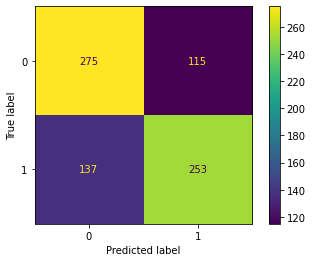

In [60]:
cm1 = confusion_matrix(Y_train, X_train_prediction1, labels=model1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model1.classes_)
disp1.plot()

From the above confusion matrix we can understand that,
TP (True Positive) = 275 (Actually these are classified as converted sales and actually they are.)
TN (True Negative) = 253 (Actually these are classified as nonconverted sales and actually they are.)
FP (False Postive) = 137 (Actually these are classified as converted sales and actually they are not.)
FN (False Negative) = 115 (Actually these are classified as nonconverted sales and actually they are.)

##### Hamming Loss

In [64]:
hamming_loss1 = hamming_loss(Y_train, X_train_prediction1) #The hamming loss is the fraction of labels that are incorrectly predicted.
print(hamming_loss1)

0.3230769230769231


Hamming loss of the Logistic Regression Model is 0.32. That means this model predicted 32 % of labels incorrectly.

###### 2. Naive Bayes

In [37]:
model2=GaussianNB()
Y_train=Y_train.astype('int')
model2.fit(X_train, Y_train)

GaussianNB()

Finding accuracy score & precision score on traing and test data.

In [38]:
# Accuracy on Training Data
X_train_prediction2=model2.predict(X_train)
train_data_accuracy2=accuracy_score(X_train_prediction2,Y_train)
train_data_precisionscore2=precision_score(X_train_prediction2,Y_train,average=None,zero_division=1)

In [39]:
print('Accuracy Score: ', train_data_accuracy2,'\nPrecision score: ', train_data_precisionscore2 )

Accuracy Score:  0.6448717948717949 
Precision score:  [0.58717949 0.7025641 ]


In [40]:
Y_test=Y_test.astype('int')
X_test_prediction2=model2.predict(X_test)
test_data_accuracy2=accuracy_score(X_test_prediction2,Y_test)
test_data_precisionscore2=precision_score(X_test_prediction2,Y_test,average=None,zero_division=1)

In [41]:
print('Accuracy Score: ', test_data_accuracy2,'\nPrecision score: ', test_data_precisionscore2 )

Accuracy Score:  0.6632653061224489 
Precision score:  [0.65306122 0.67346939]


The Accuracy of training data is 0.645 (rounded for 3 decimals) and test data is 0.663 (rounded for 3 decimals). The Precision score of the training data and testing data is 0.587 and 0.653 respectively. That means the prediction of this model is approximately 65 % accurate and will be correct almost 63 % of the time.

##### Confusion Matrix

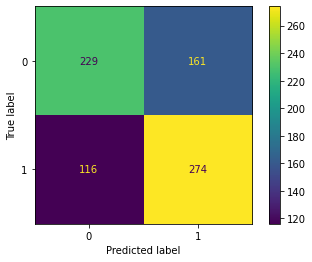

In [59]:
cm2 = confusion_matrix(Y_train, X_train_prediction2, labels=model2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot()

From the above confusion matrix we can understand that,
TP (True Positive) = 229 (Actually these are classified as converted sales and actually they are.)
TN (True Negative) = 274 (Actually these are classified as nonconverted sales and actually they are.)
FP (False Postive) = 116 (Actually these are classified as converted sales and actually they are not.)
FN (False Negative) = 161 (Actually these are classified as nonconverted sales and actually they are.)

##### Hamming Loss

In [65]:
hamming_loss2 = hamming_loss(Y_train, X_train_prediction2) #The hamming loss is the fraction of labels that are incorrectly predicted.
print(hamming_loss2)

0.35512820512820514


Hamming loss of the Naive Bayes Model is 0.36. That means this model predicted 36 % of labels incorrectly.

###### 3. KNeighbors Classifier

In [42]:
model3=KNeighborsClassifier(n_neighbors=5)
Y_train=Y_train.astype('int')
model3.fit(X_train, Y_train)

KNeighborsClassifier()

Finding accuracy score & precision score on traing and test data.

In [43]:
# Accuracy on Training Data
X_train_prediction3=model3.predict(X_train)
train_data_accuracy3=accuracy_score(X_train_prediction3,Y_train)
train_data_precisionscore3=precision_score(X_train_prediction3,Y_train,average=None,zero_division=1)

In [44]:
print('Accuracy Score: ', train_data_accuracy3,'\nPrecision score: ', train_data_precisionscore3 )

Accuracy Score:  0.7730769230769231 
Precision score:  [0.79487179 0.75128205]


In [45]:
Y_test=Y_test.astype('int')
X_test_prediction3=model3.predict(X_test)
test_data_accuracy3=accuracy_score(X_test_prediction3,Y_test)
test_data_precisionscore3=precision_score(X_test_prediction3,Y_test,average=None,zero_division=1)

In [46]:
print('Accuracy Score: ', test_data_accuracy3,'\nPrecision score: ', test_data_precisionscore3 )

Accuracy Score:  0.6326530612244898 
Precision score:  [0.70408163 0.56122449]


The Accuracy of training data is 0.773 (rounded for 3 decimals) and test data is 0.632 (rounded for 3 decimals). The Precision score of the training data and testing data is 0.794 and 0.704 respectively.

##### Confusion Matrix

In [48]:
cm3 = confusion_matrix(Y_train, X_train_prediction3, labels=model3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=model3.classes_)

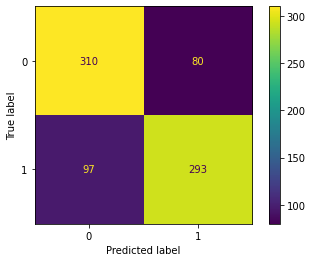

In [49]:
disp3.plot()

From the above confusion matrix we can understand that,
TP (True Positive) = 310 (Actually these are classified as converted sales and actually they are.)
TN (True Negative) = 293 (Actually these are classified as nonconverted sales and actually they are.)
FP (False Postive) = 97 (Actually these are classified as converted sales and actually they are not.)
FN (False Negative) = 80 (Actually these are classified as nonconverted sales and actually they are.)

##### Hamming Loss

In [66]:
hamming_loss3 = hamming_loss(Y_train, X_train_prediction3) #The hamming loss is the fraction of labels that are incorrectly predicted.
print(hamming_loss3)

0.22692307692307692


Hamming loss of the KNeighbors Classifier Model is 0.23. That means this model predicted 23 % of labels incorrectly.

###### 4. Support Vector Classification

In [50]:
model4=make_pipeline(StandardScaler(), SVC(gamma='auto'))
Y_train=Y_train.astype('int')
model4.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Finding accuracy score & precision score on traing and test data.

In [51]:
# Accuracy on Training Data
X_train_prediction4=model4.predict(X_train)
train_data_accuracy4=accuracy_score(X_train_prediction4,Y_train)
train_data_precisionscore4=precision_score(X_train_prediction4,Y_train,average=None,zero_division=1)

In [52]:
print('Accuracy Score: ', train_data_accuracy4,'\nPrecision score: ', train_data_precisionscore4)

Accuracy Score:  0.8205128205128205 
Precision score:  [0.92564103 0.71538462]


In [53]:
Y_test=Y_test.astype('int')
X_test_prediction4=model4.predict(X_test)
test_data_accuracy4=accuracy_score(X_test_prediction4,Y_test)
test_data_precisionscore4=precision_score(X_test_prediction4,Y_test,average=None,zero_division=1)

In [54]:
print('Accuracy Score: ', test_data_accuracy4,'\nPrecision score: ', test_data_precisionscore4)

Accuracy Score:  0.7653061224489796 
Precision score:  [0.91836735 0.6122449 ]


The Accuracy of training data is 0.821 (rounded for 3 decimals) and test data is 0.765 (rounded for 3 decimals). The Precision score of the training data and testing data is 0.926 and 0.918 respectively. That means the prediction of this model is approximately 80 % accurate and will be correct almost 92 % of the time.

##### Confusion Matrix

In [57]:
cm4 = confusion_matrix(Y_train, X_train_prediction4, labels=model4.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=model4.classes_)

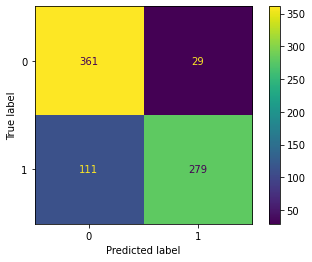

In [58]:
disp4.plot()

From the above confusion matrix we can understand that,
TP (True Positive) = 361 (Actually these are classified as converted sales and actually they are.)
TN (True Negative) = 279 (Actually these are classified as nonconverted sales and actually they are.)
FP (False Postive) = 111 (Actually these are classified as converted sales and actually they are not.)
FN (False Negative) = 29 (Actually these are classified as nonconverted sales and actually they are.)

##### Hamming Loss

In [67]:
hamming_loss4 = hamming_loss(Y_train, X_train_prediction4) #The hamming loss is the fraction of labels that are incorrectly predicted.
print(hamming_loss4)

0.1794871794871795


Hamming loss of the Support Vector Classifier Model is 0.18. That means this model predicted 18 % of labels incorrectly.